<h1 style="text-align: center; font-weight: bold;">Student Depression Analysis</h1>

<div style="text-align: right;">
    TOURNIER Quentin<br>
    OULD ALI Walid
</div>


# *Import libraries*

In [491]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We will use scikit-learn for modeling, scaling, and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


# *Load the dataset*

In [492]:
# The dataset is stored in a GitHub Gist URL. We read it directly into a pandas DataFrame.
url = "https://gist.githubusercontent.com/QuentinTournier40/14b290ebe3414e38f50c04a3e2fc6665/raw/8ae8c7772d880ca63d05ee0a9324bb24fa457c2f/student_depression"
data = pd.read_csv(url)

# Display the first few rows to verify correct loading
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# *Basic Info and Data Types*

In [493]:
# info() gives us a summary of the dataset, including column dtypes and non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

#  *Summary Statistics*

In [494]:
# helps us see basic statistics (count, mean, std, min, quartiles, max) for numeric columns.
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


# *Data types and unique value counts*

In [495]:
print("\nData types:\n", data.dtypes)


Data types:
 id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [496]:
print("\nUnique Values Count:\n", data.nunique())


Unique Values Count:
 id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64


# *Missing value analysis*

In [497]:
# We check for missing (NaN) values in each column. This is crucial to handle them before modeling.
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


There are only 3 missing values in the **Financial stress** fields.\
We decided to fill in these data with the median values of the other financial stress values.

In [498]:
# Fill missing values in 'Financial Stress' with the column median, a common practice for numerical data
data['Financial Stress'] = data['Financial Stress'].fillna(data['Financial Stress'].median())
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

# *Feature distribution analysis*

### *Gender Distribution*

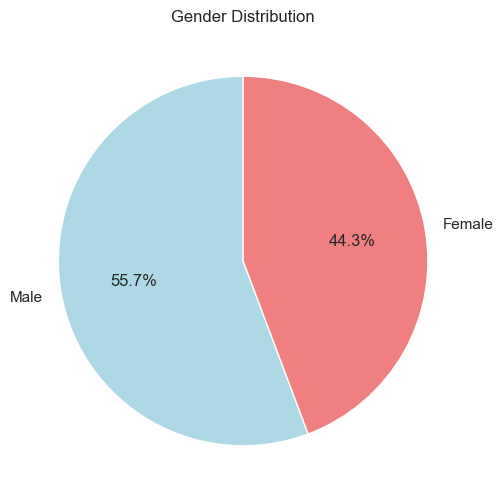

In [499]:
# Let's visualize the distribution of Gender via a pie chart
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightcoral']
)
plt.title('Gender Distribution')
plt.ylabel('')  # Hide y-axis label for cleanliness
plt.show()

# *Numerical Feature Distributions*

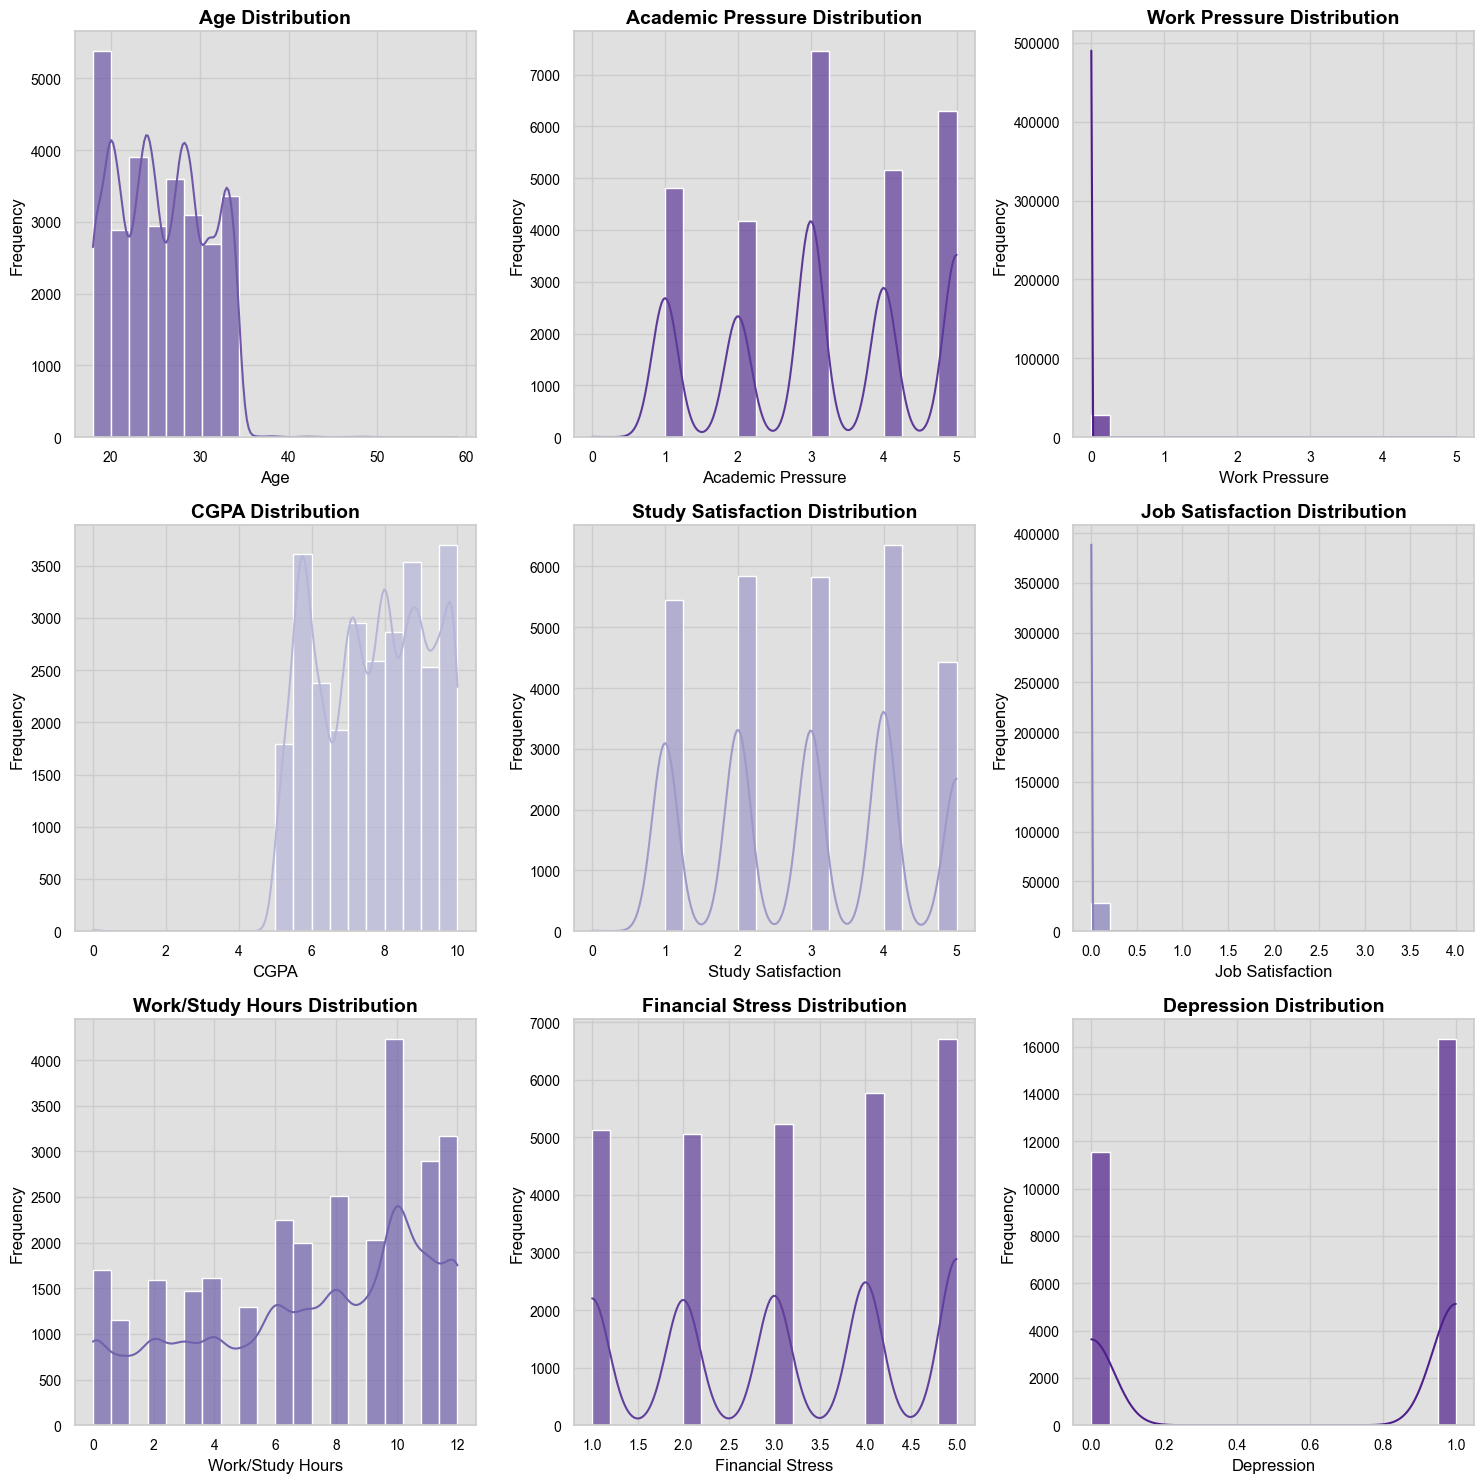

In [500]:
# Identify numeric columns, excluding any 'id' column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']

# We'll make a grid of histograms to explore the distribution of each numeric column
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Adjust the color palette for aesthetics
sns.set_theme(style="darkgrid")
colors = sns.color_palette("Purples", num_cols)
dark_colors = sns.color_palette("Purples", 10)[7:10]
colors[:3] = dark_colors

for i, col in enumerate(numerical_columns):
    sns.histplot(
        data[col],
        kde=True,
        bins=20,
        color=colors[i],
        ax=axes[i],
        alpha=0.7
    )
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')

# Remove any unused subplots if the grid is larger than the number of numeric columns
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# *Categorical Features Distribution*

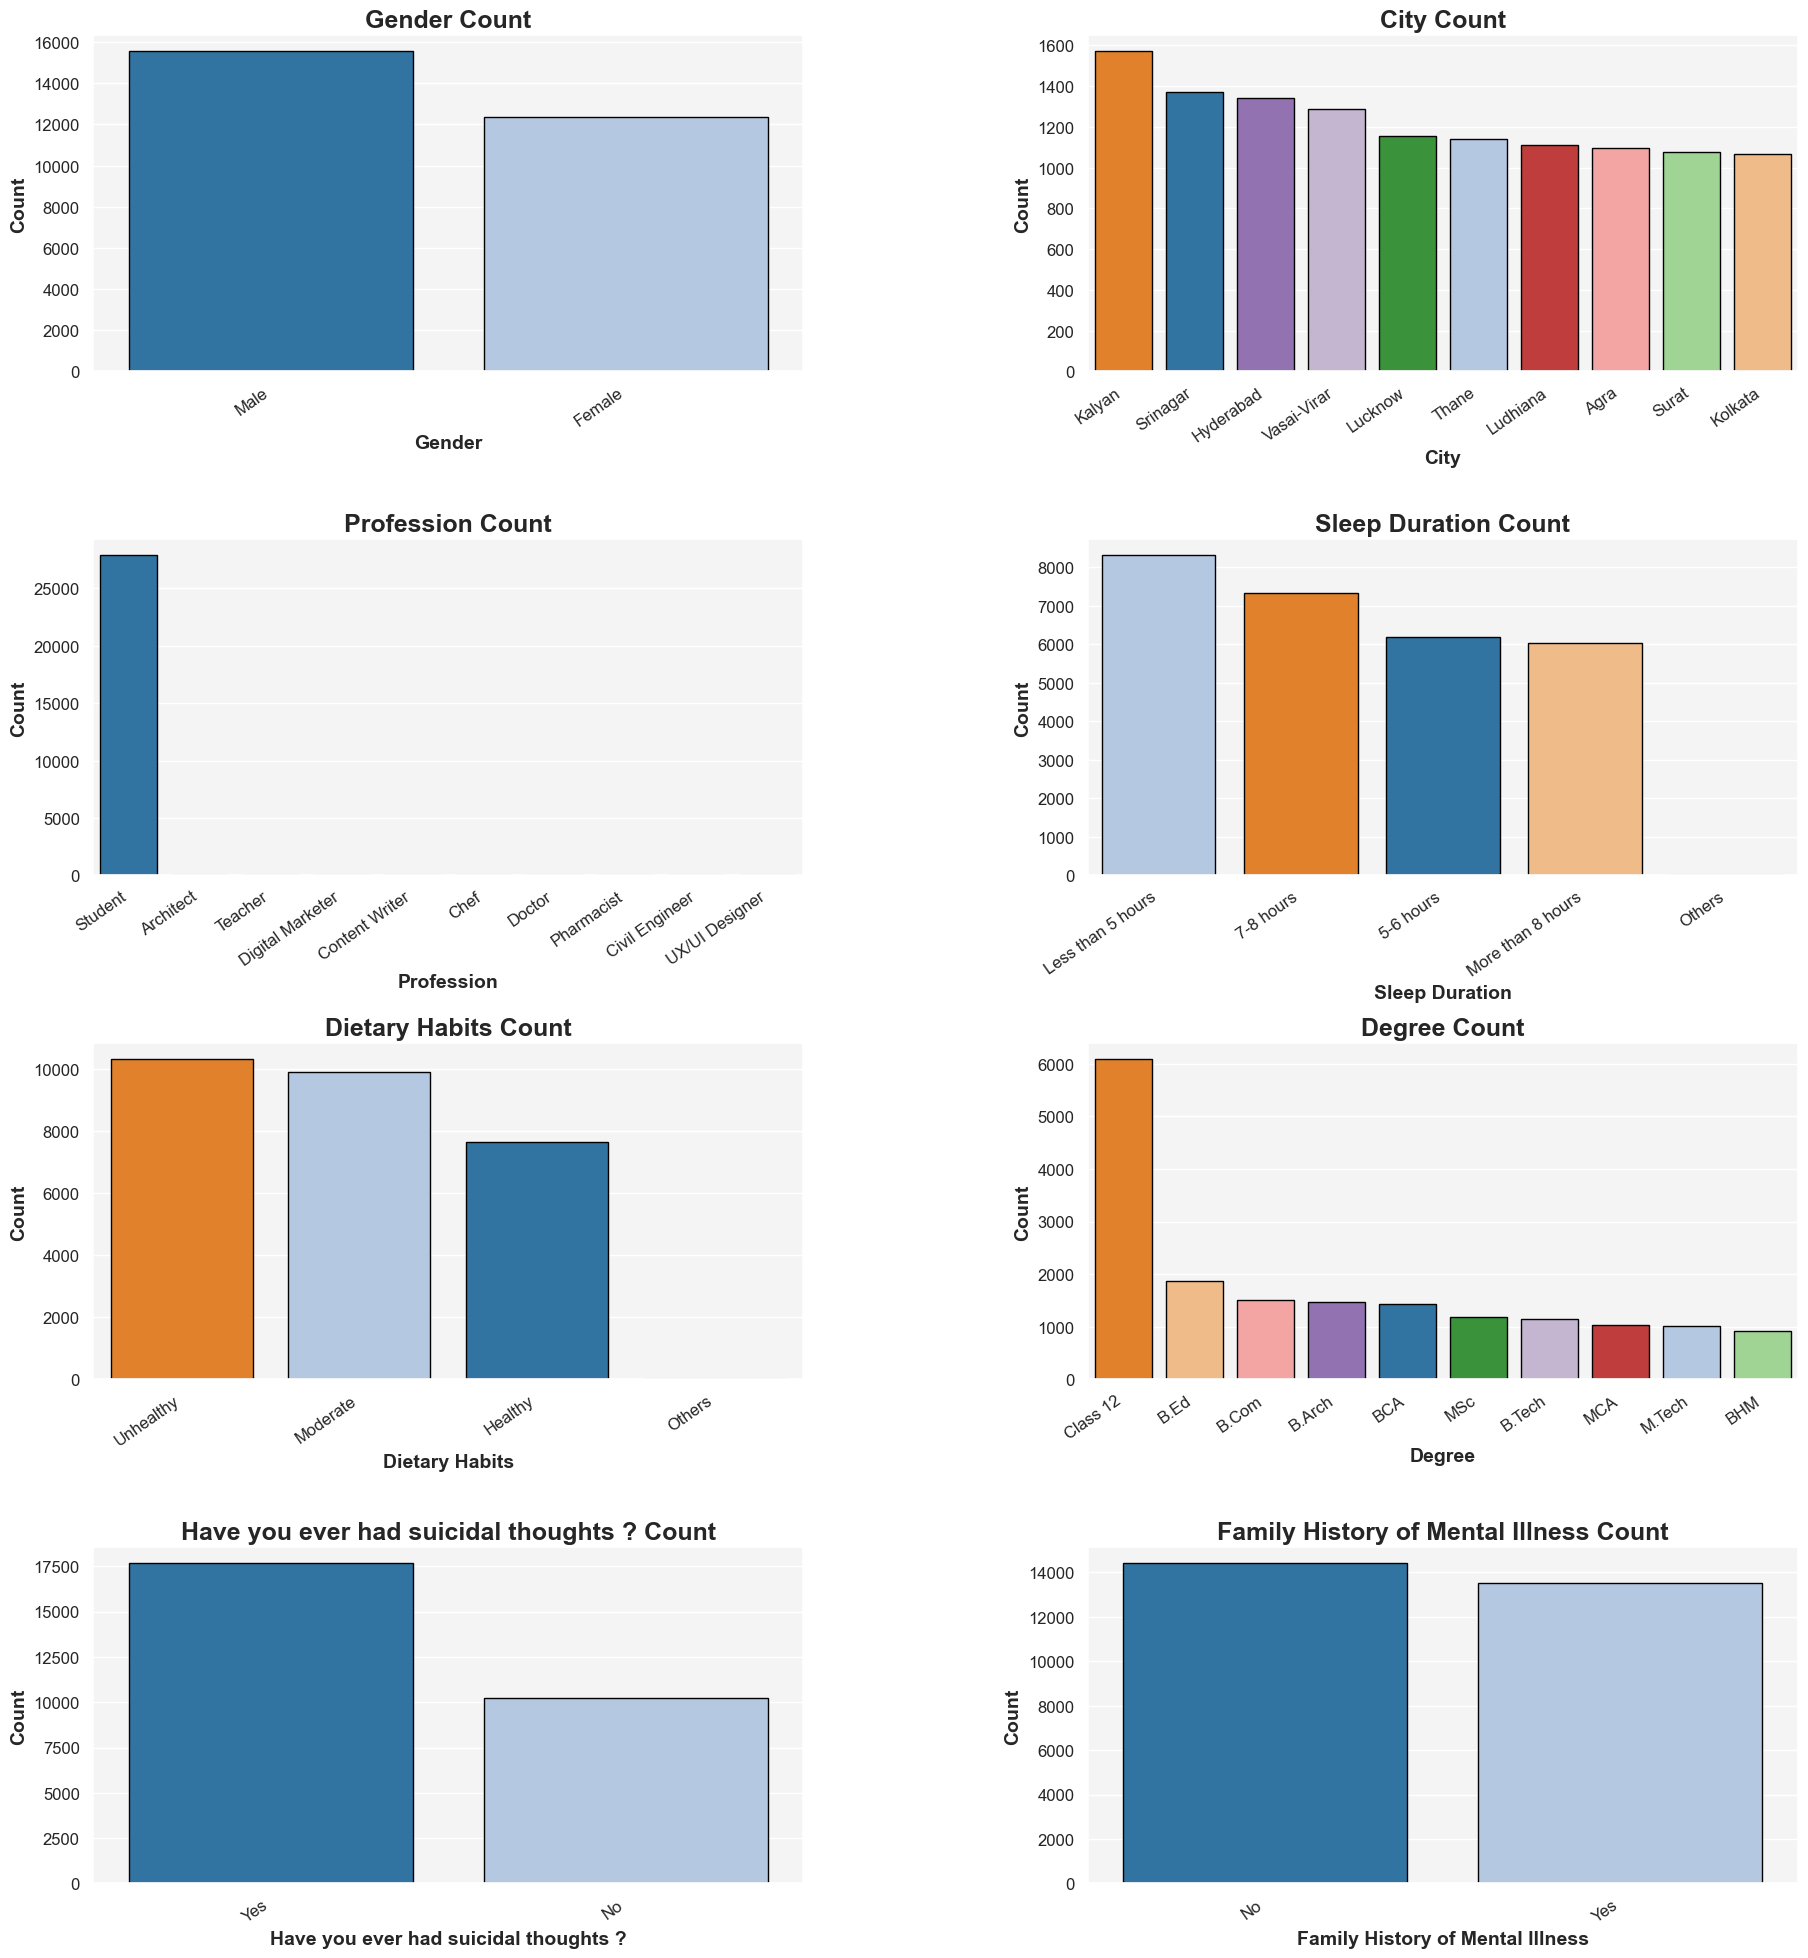

In [501]:
# Identify categorical columns (type 'object'), excluding 'id'
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

# If we have categorical columns, let's create count plots for each
if not categorical_columns:
    print("No categorical columns found!")
else:
    num_cols = 2  # We'll have two plots per row
    num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
    axes = axes.flatten()

    sns.set_theme(style="whitegrid")

    for i, col in enumerate(categorical_columns):
        num_categories = data[col].nunique()  # Number of unique categories

        # If there are more than 10 unique values, we'll show only the top 10
        if num_categories > 10:
            top_values = data[col].value_counts().index[:10]
            filtered_data = data[data[col].isin(top_values)]
        else:
            filtered_data = data

        colors = sns.color_palette("tab20", min(num_categories, 10))  # Tab20 supports up to 20 distinct colors

        sns.countplot(
            data=filtered_data,
            x=col,
            ax=axes[i],
            palette=colors,
            hue=col,  # show different categories with different colors
            legend=False,
            order=filtered_data[col].value_counts().index
        )

        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=35, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

        # Ensure labels are angled in a readable manner
        for label in axes[i].get_xticklabels():
            label.set_horizontalalignment('right')

        for bar in axes[i].patches:
            bar.set_edgecolor('black')

        axes[i].set_facecolor('#f4f4f4')

    # Remove any unused subplots
    for i in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[i])

    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.show()

# *Correlation analysis*

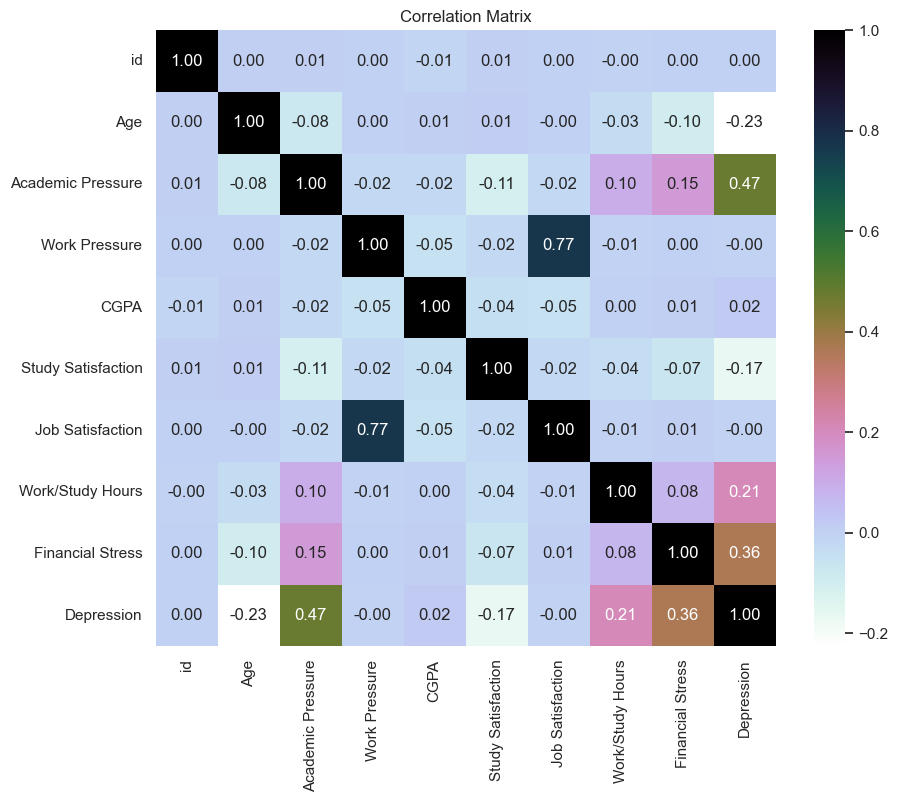

In [502]:
# We calculate the correlation matrix for numeric features and visualize it with a heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Academic Pressure (0.47 correlation with Depression)
There is a moderate positive correlation between academic pressure and depression. This suggests that students experiencing high academic pressure are more likely to report symptoms of depression.

### Suicidal Thoughts (0.55 correlation with Depression)
This is the highest positive correlation in the matrix, indicating that students who have had suicidal thoughts are significantly more likely to experience depression.

### Financial Stress (0.36 correlation with Depression)
Financial stress is also positively correlated with depression, showing that students struggling financially may be at a higher risk of mental health issues.

### Work/Study Hours (0.21 correlation with Depression)
While not as strong as the previous factors, there is still a noticeable correlation. This might suggest that longer work/study hours could contribute to increased stress and mental health issues.

### Study Satisfaction (-0.17 correlation with Depression)
A weak negative correlation suggests that students who are more satisfied with their studies are slightly less likely to experience depression.

### Age (-0.23 correlation with Depression)
A mild negative correlation indicates that younger students may be more prone to depression compared to older students.
Other Observations:

### Work Pressure (0.00 correlation with Depression)
Surprisingly, work pressure does not seem to have a direct correlation with depression in this dataset.

### Job Satisfaction (0.00 correlation with Depression)
Similar to work pressure, job satisfaction does not appear to influence depression significantly.

# *Outlier detection*

In [503]:
# We'll define a function to detect outliers using the IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers


numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']

numerical_outliers = detect_outliers_iqr(data, numerical_columns)

print(f"Outliers detected in columns:")
for col, outlier_data in numerical_outliers.items():
    print(col)

Outliers detected in columns:
Age
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Work/Study Hours
Financial Stress
Depression


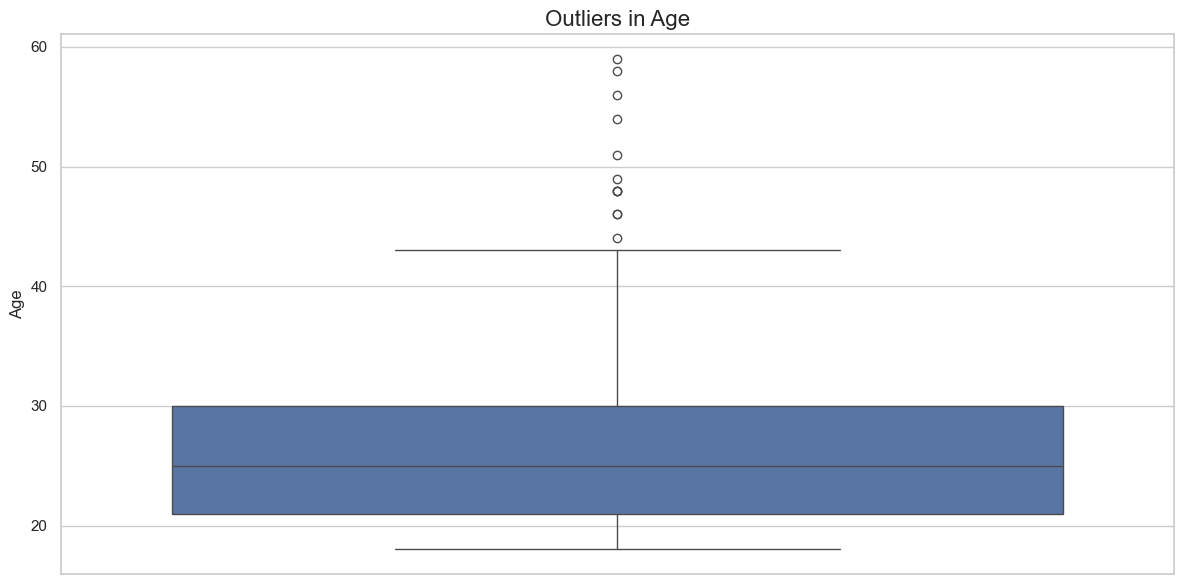

In [504]:
# We'll look at boxplots for relevant columns to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Age"])
plt.title('Outliers in Age', fontsize=16)
plt.tight_layout()
plt.show()

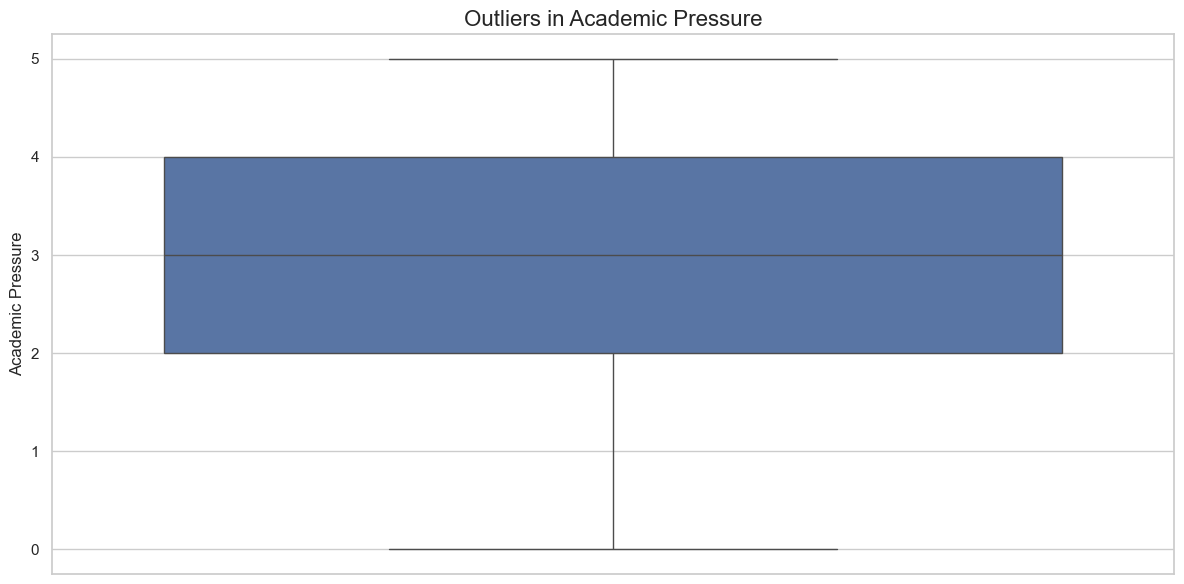

In [505]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Academic Pressure"])
plt.title('Outliers in Academic Pressure', fontsize=16)
plt.tight_layout()
plt.show()

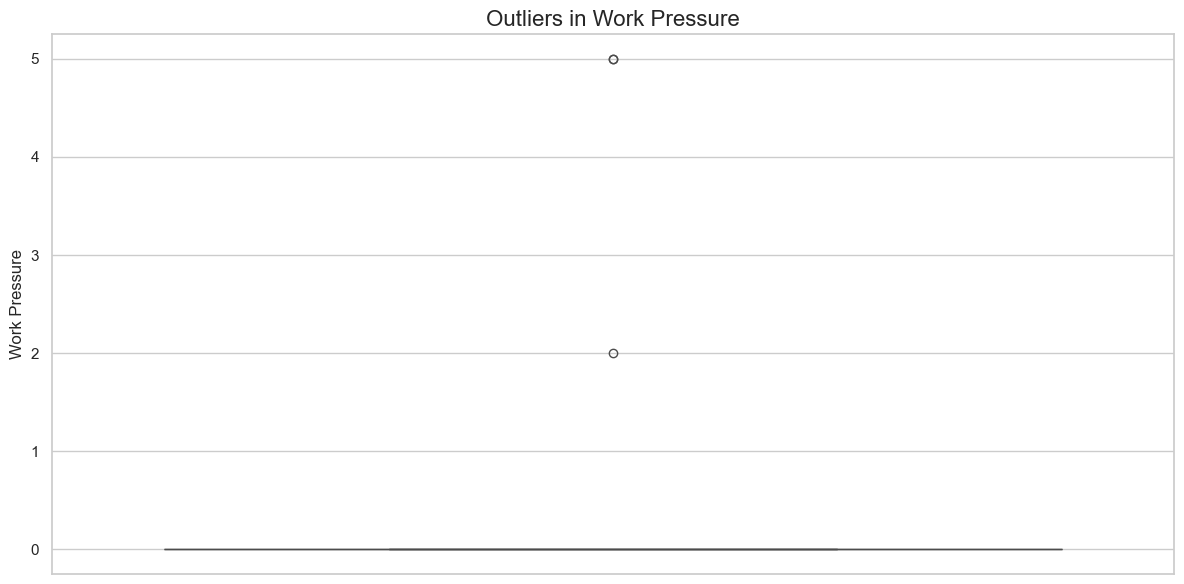

In [506]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Work Pressure"])
plt.title('Outliers in Work Pressure', fontsize=16)
plt.tight_layout()
plt.show()

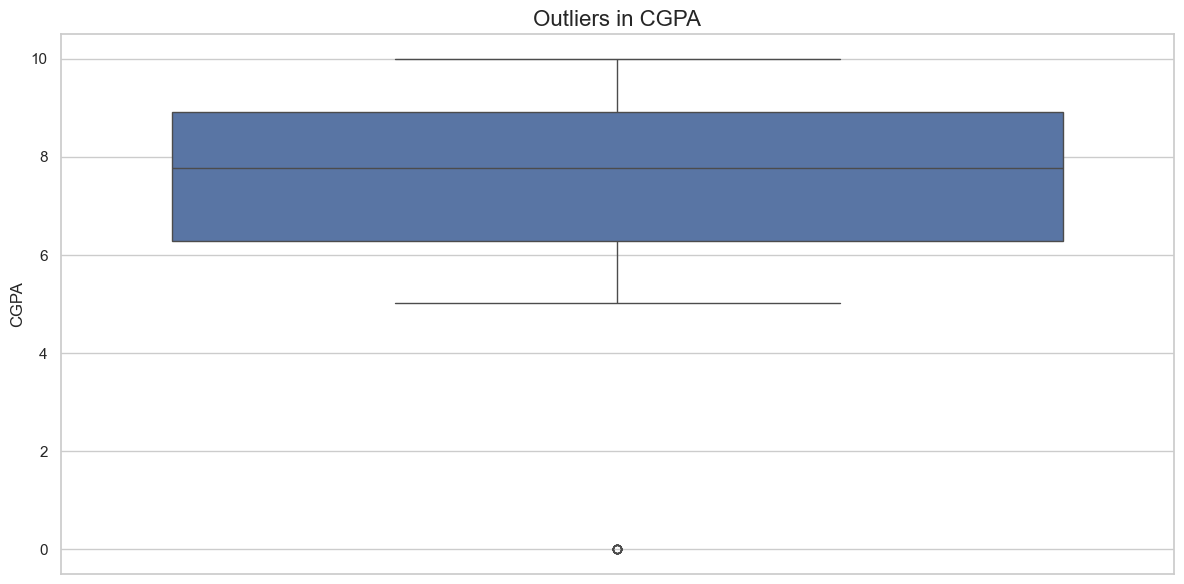

In [507]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["CGPA"])
plt.title('Outliers in CGPA', fontsize=16)
plt.tight_layout()
plt.show()

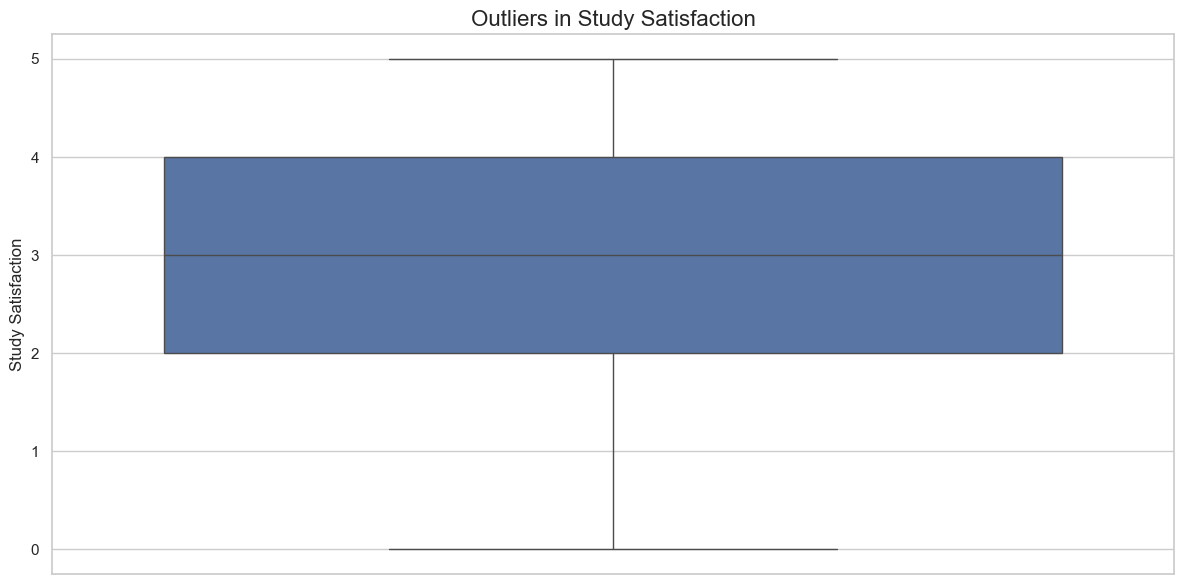

In [508]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Study Satisfaction"])
plt.title('Outliers in Study Satisfaction', fontsize=16)
plt.tight_layout()
plt.show()

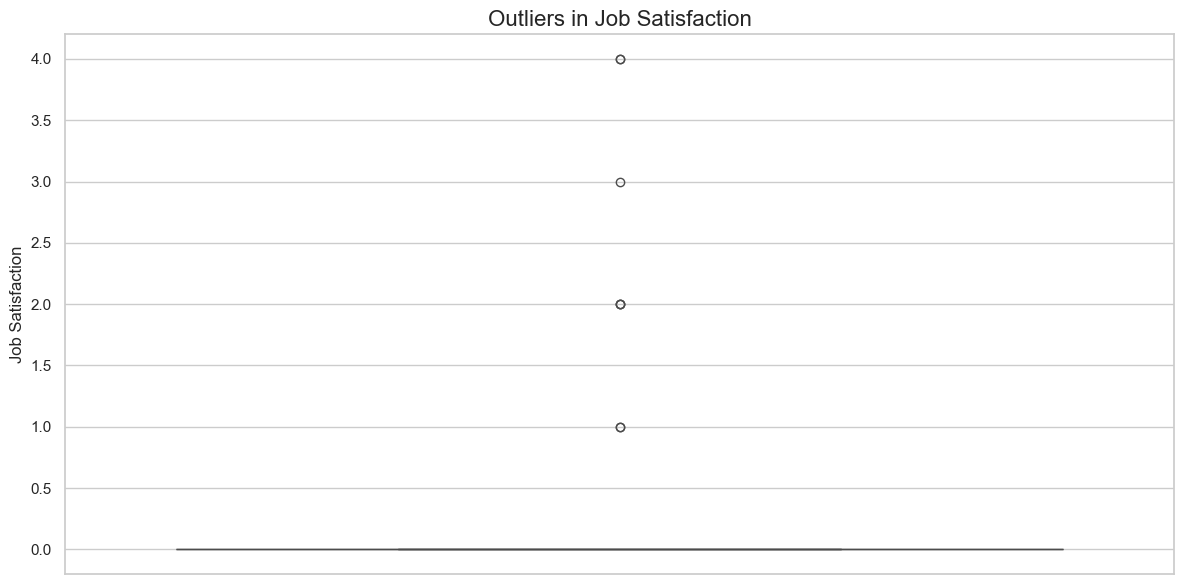

In [509]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Job Satisfaction"])
plt.title('Outliers in Job Satisfaction', fontsize=16)
plt.tight_layout()
plt.show()

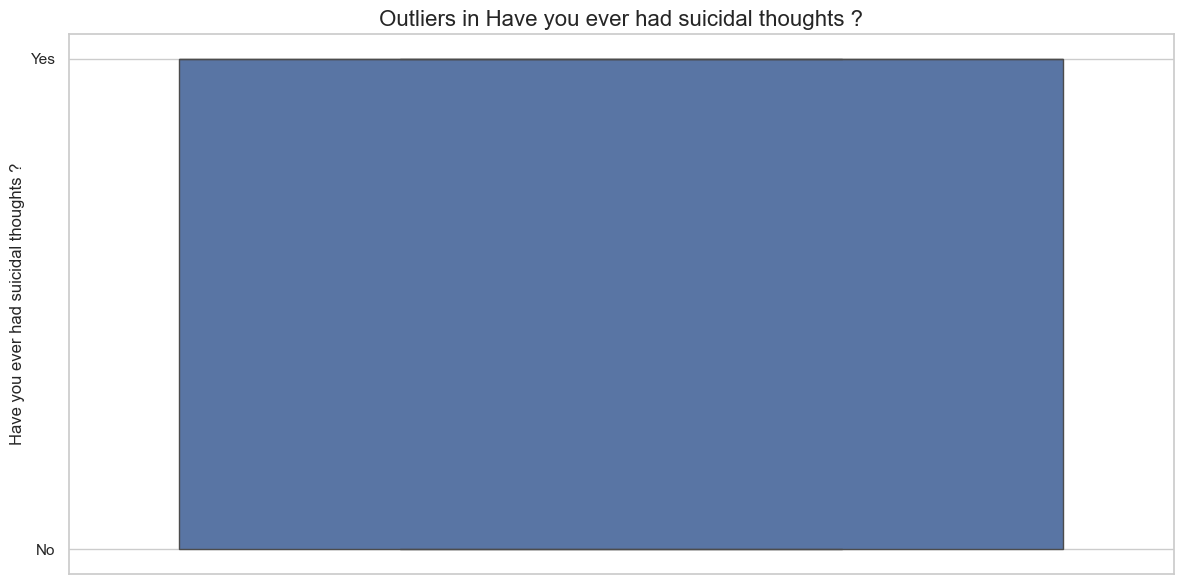

In [510]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Have you ever had suicidal thoughts ?"])
plt.title('Outliers in Have you ever had suicidal thoughts ?', fontsize=16)
plt.tight_layout()
plt.show()

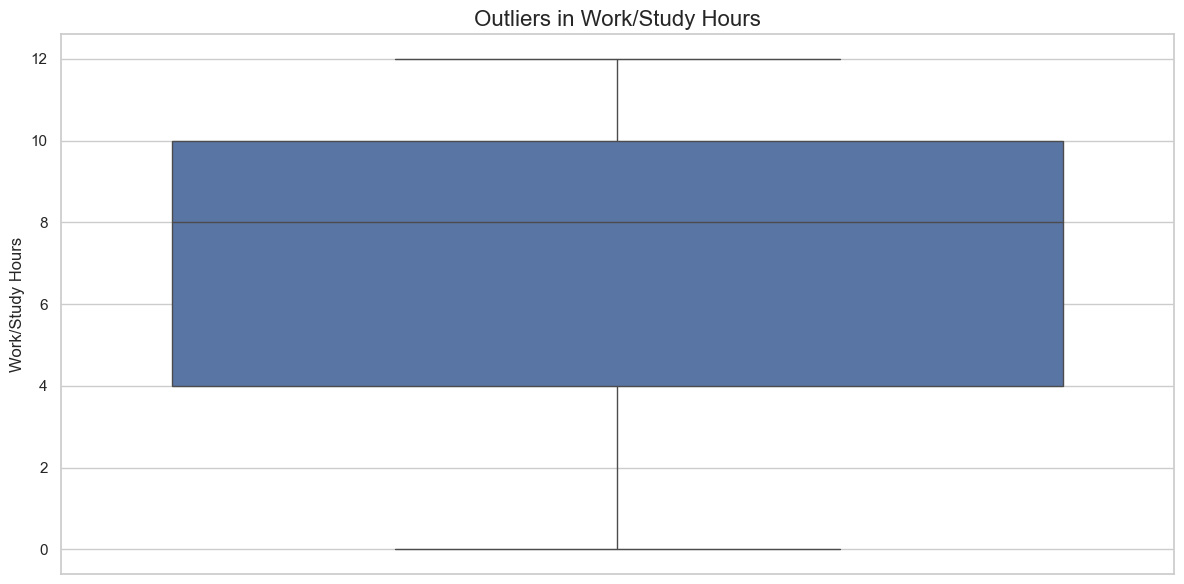

In [511]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Work/Study Hours"])
plt.title('Outliers in Work/Study Hours', fontsize=16)
plt.tight_layout()
plt.show()

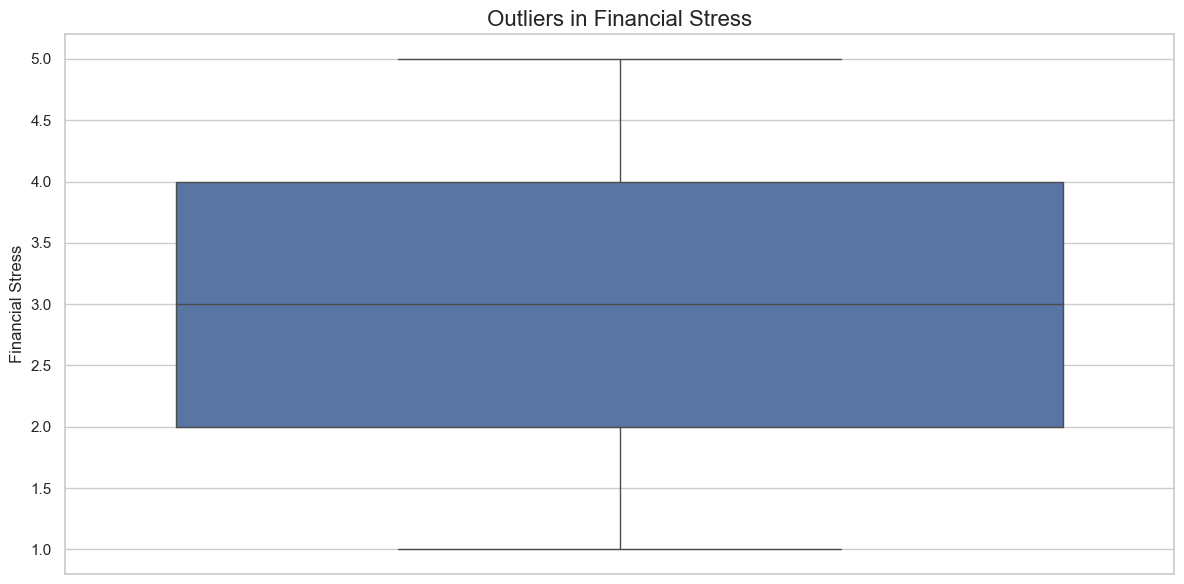

In [512]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Financial Stress"])
plt.title('Outliers in Financial Stress', fontsize=16)
plt.tight_layout()
plt.show()

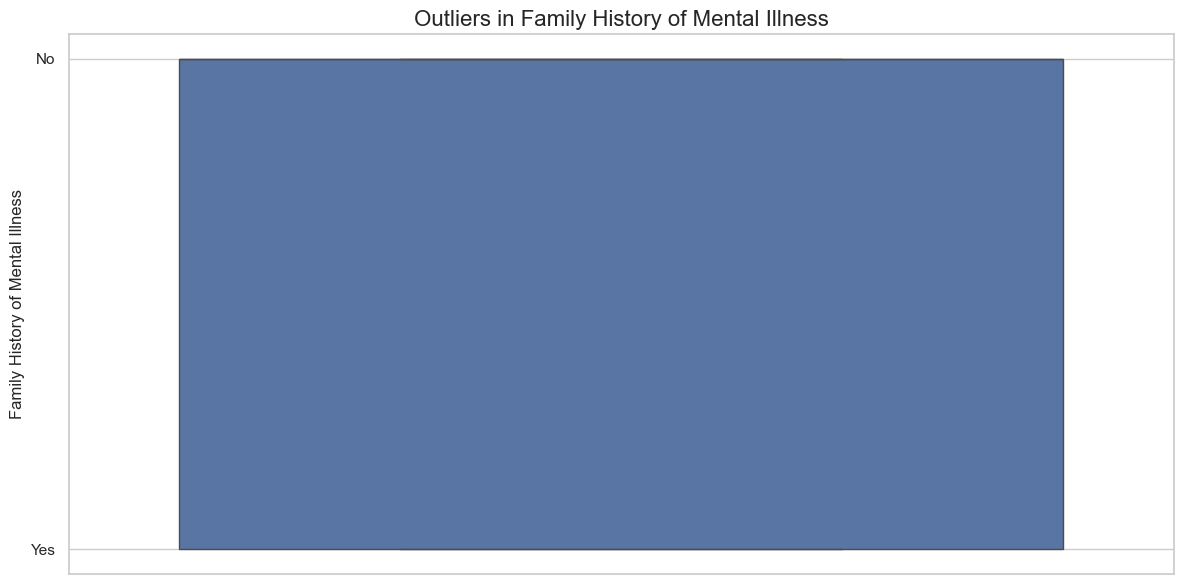

In [513]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Family History of Mental Illness"])
plt.title('Outliers in Family History of Mental Illness', fontsize=16)
plt.tight_layout()
plt.show()

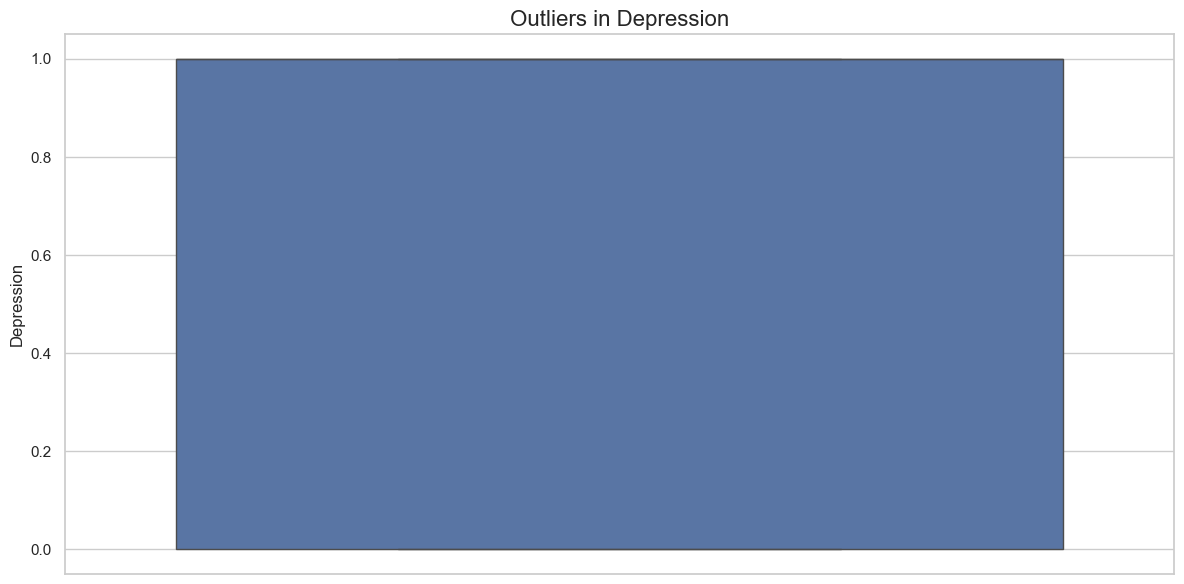

In [514]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Depression"])
plt.title('Outliers in Depression', fontsize=16)
plt.tight_layout()
plt.show()

Mainly, all the numericals data are good. But on the **Age**, we can see some outliers.

# *Data scaling*

In [515]:
# We select a subset of numeric columns to scale (these are the features we'll later keep)
numerical_columns = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress'
]

# Apply StandardScaler to transform each column to ~N(0,1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Place scaled results into a new DataFrame with the same columns
df_scaled = pd.DataFrame(scaled_data, columns=numerical_columns)
df_scaled.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.121213,-1.488857
1,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.121213,-0.793081
2,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.497095,-1.488857
3,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.851495,1.294246
4,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.660650,-1.488857


# *Encode categorical variables*

In [516]:
# We have some binary columns ('Yes'/'No'), which we map to 1/0
binary_columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_columns:
    # Strip potential whitespace, then map
    data[col] = data[col].astype(str).str.strip()
    data[col] = data[col].map({'Yes': 1, 'No': 0})
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


In [517]:
# For columns like 'Sleep Duration' and 'Dietary Habits', we have an ordinal mapping
ordinal_mapping = {
    'Sleep Duration': {
        'Less than 5 hours': 1,
        '5-6 hours': 2,
        '7-8 hours': 3,
        'More than 8 hours': 4,
        'Others': 0
    },
    'Dietary Habits': {
        'Unhealthy': 1,
        'Moderate': 2,
        'Healthy': 3,
        'Others': 0
    }
}

# Apply the ordinal mapping
for col, mapping in ordinal_mapping.items():
    data[col] = data[col].astype(str).str.strip()
    data[col] = data[col].map(mapping)

data.head()    

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,2,3,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,2,2,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,1,3,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,3,2,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,2,2,M.Tech,1,1.0,1.0,0,0


# *Droping unnecessary columns*

In [518]:
# Remove columns we won't use for modeling
df = data.drop(
    columns=[
        'id', 'Profession', 'Degree', 'Work Pressure', 'City',
        'Gender', 'Academic Pressure', 'CGPA',
        'Study Satisfaction', 'Job Satisfaction',
        'Work/Study Hours', 'Financial Stress'
    ]
)
df.head()

,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
0,33.0,2,3,1,0,1
1,24.0,2,2,0,1,0
2,31.0,1,3,0,1,0
3,28.0,3,2,1,1,1
4,25.0,2,2,1,0,0


# *Concatenate Scaled Data with Encoded Data*

In [519]:
# Combine the scaled numeric columns with our remaining DataFrame
df_final = pd.concat([df_scaled, df], axis=1)
df_final.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
0,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.121213,-1.488857,33.0,2,3,1,0,1
1,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.121213,-0.793081,24.0,2,2,0,1,0
2,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.497095,-1.488857,31.0,1,3,0,1,0
3,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.851495,1.294246,28.0,3,2,1,1,1
4,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.660650,-1.488857,25.0,2,2,1,0,0


# *Splitting the dataset*

In [520]:
# Separate features (X) and target (y). The target is 'Depression'.
X = df_final.drop(columns=['Depression'])
y = df_final['Depression']

# We do an 80/20 split. Stratify ensures class proportions remain consistent in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
X_train.head()

Training Set: (22320, 13), Testing Set: (5581, 13)


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness
1657,-1.594566,0.621660,-0.009777,-1.112481,-1.428112,-0.01534,-1.121213,1.294246,18.0,3,2,1,0
24995,-0.167625,-0.102222,-0.009777,-0.874496,-0.693425,-0.01534,0.497095,-1.488857,25.0,3,2,0,1
27613,0.851619,-0.102222,-0.009777,1.076981,-0.693425,-0.01534,-0.581777,1.294246,30.0,3,1,1,1
13512,1.667013,-0.102222,-0.009777,-0.194539,1.510636,-0.01534,1.306249,-0.097305,34.0,3,2,1,0
27029,-0.167625,-0.102222,-0.009777,-0.126543,0.775949,-0.01534,1.036531,1.294246,25.0,2,1,0,0


# **Machine Learning Model**

### *RandomForest*

In [521]:
# Train a Random Forest with 100 trees
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = model_random_forest.predict(X_test)

# Calculate accuracy on test data
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Accuracy: {accuracy_random_forest:.2f}")

# Perform 5-fold cross-validation to gauge consistency across different splits
cv_scores_random_forest = cross_val_score(model_random_forest, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores: ", cv_scores_random_forest)
print(f"Mean Accuracy: {cv_scores_random_forest.mean():.2f} ± {cv_scores_random_forest.std():.2f}")

Accuracy: 0.83
Cross-Validation Scores:  [0.83318402 0.84121864 0.83512545 0.83870968 0.84086022]
Mean Accuracy: 0.84 ± 0.00


### *LogisticRegression*

In [522]:
# Logistic Regression is a linear model for binary classification
model_logistic_regression = LogisticRegression(random_state=42)
model_logistic_regression.fit(X_train, y_train)

y_pred_logistic_regression = model_logistic_regression.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

print(f"Accuracy: {accuracy_logistic_regression:.2f}")

# 5-fold cross-validation for logistic regression
cv_scores_logistic_regression = cross_val_score(
    model_logistic_regression, X, y, cv=5, scoring='accuracy'
)
print("Cross-Validation Scores: ", cv_scores_logistic_regression)
print(f"Mean Accuracy: {cv_scores_logistic_regression.mean():.2f} ± {cv_scores_logistic_regression.std():.2f}")

Accuracy: 0.84
Cross-Validation Scores:  [0.84160545 0.8516129  0.84318996 0.84498208 0.85286738]
Mean Accuracy: 0.85 ± 0.00


### *KNeighbors*

In [523]:
# KNN makes predictions based on the closest neighbors in feature space
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

cv_scores_knn = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores: ", cv_scores_knn)
print(f"Mean Accuracy: {cv_scores_knn.mean():.2f} ± {cv_scores_knn.std():.2f}")

Accuracy: 0.82
Cross-Validation Scores:  [0.81956639 0.8202509  0.80663082 0.82114695 0.82043011]
Mean Accuracy: 0.82 ± 0.01


# *ROC*

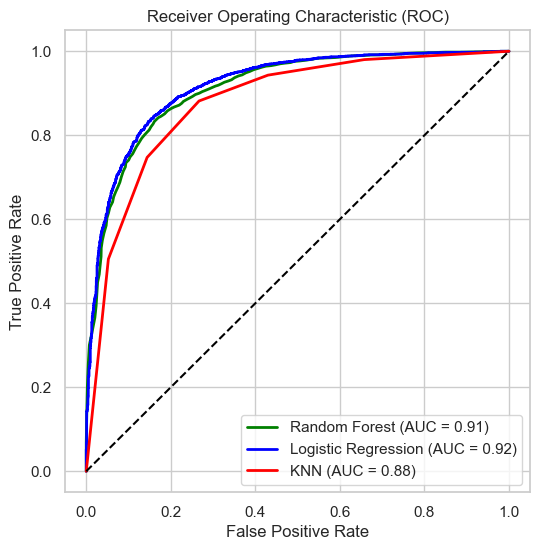

In [524]:
# Compute ROC curves and AUC for each model
fpr_random_forest, tpr_random_forest, _ = roc_curve(
    y_test, model_random_forest.predict_proba(X_test)[:, 1]
)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

fpr_logistic_regression, tpr_logistic_regression, _ = roc_curve(
    y_test, model_logistic_regression.predict_proba(X_test)[:, 1]
)
roc_auc_logistic_regression = auc(fpr_logistic_regression, tpr_logistic_regression)

fpr_knn, tpr_knn, _ = roc_curve(
    y_test, model_knn.predict_proba(X_test)[:, 1]
)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the three ROC curves in one figure
plt.figure(figsize=(6, 6))
plt.plot(
    fpr_random_forest, tpr_random_forest, color='green', lw=2,
    label=f'Random Forest (AUC = {roc_auc_random_forest:.2f})'
)
plt.plot(
    fpr_logistic_regression, tpr_logistic_regression, color='blue', lw=2,
    label=f'Logistic Regression (AUC = {roc_auc_logistic_regression:.2f})'
)
plt.plot(
    fpr_knn, tpr_knn, color='red', lw=2,
    label=f'KNN (AUC = {roc_auc_knn:.2f})'
)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# *Feature importance*

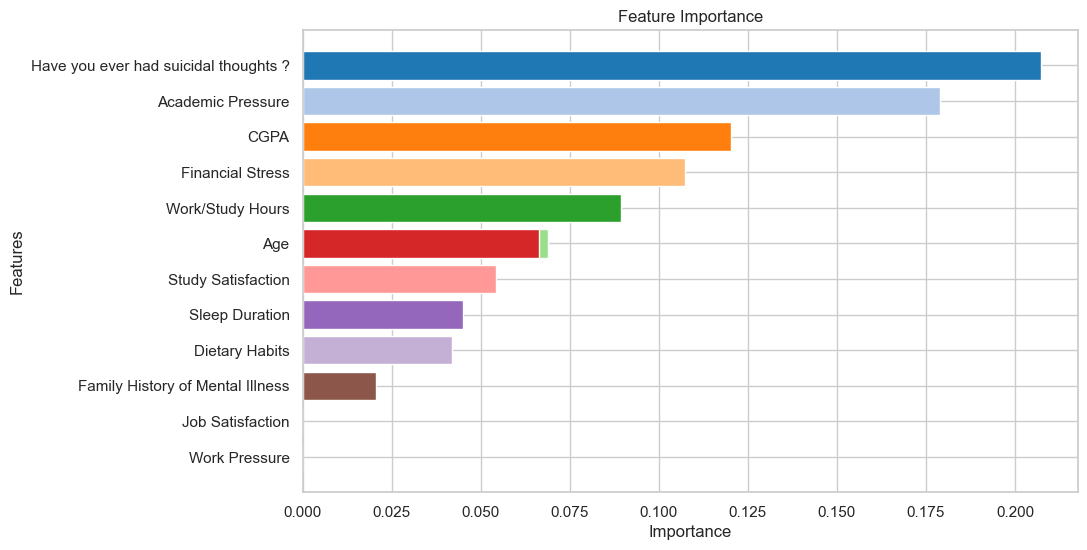

In [525]:
# We check how much each feature contributed to the Random Forest decisions
importance = model_random_forest.feature_importances_
features = X_train.columns
colors = sns.color_palette("tab20", 20)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert axis to show most important on top
plt.show()

# *Hyperparameter*

In [526]:
# We'll perform a simple grid search over a few Random Forest parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8453853046594982


# *Class Imbalance and Confusion Matrix*

### Consufion Matrix
1. TP (True Positive): Cases that are actually positive (e.g., depressed) and correctly predicted as positive.
2. TN (True Negative): Cases that are actually negative (not depressed) and correctly predicted as negative.
3. FP (False Positive): Cases that are actually negative but incorrectly predicted as positive (“false alarm”).
4. FN (False Negative): Cases that are actually positive but incorrectly predicted as negative (“missed” positives).
rom these values, you can calculate various metrics:
* recision = TP / (TP + FP)
* recall (Sensitivity) = TP / (TP + FN)
* score = 2 × (Precision × Recall) / (Precision + Recall)

### Class Imbalance
- Class Imbalance occurs when the number of samples in one class (e.g., “Depressed”) is significantly higher or lower than in the other class (e.g., “Not Depressed”). Instead of a 50:50 split, you might see something like 80:20 or even 95:5.
- If your data is highly imbalanced, a model can appear to have high accuracy simply by predicting the majority class most of the time.


In [527]:
# 1. Class Imbalance & Additional Metrics
print("Class distribution in the full dataset:")
print(data['Depression'].value_counts())

# Quick imbalance check
class_counts = data['Depression'].value_counts()
ratio = class_counts[1] / class_counts.sum()
print(f"\nProportion of 'Depression = 1': {ratio:.2f}")

if ratio < 0.3 or ratio > 0.7:
    print("Warning: The dataset might be somewhat imbalanced.")
else:
    print("The dataset is relatively balanced.")

# We'll evaluate confusion matrices & classification reports for existing models
print("\n--- Confusion Matrix & Classification Report: Random Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))

print("\n--- Confusion Matrix & Classification Report: Logistic Regression ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_regression))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic_regression))

print("\n--- Confusion Matrix & Classification Report: KNN ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Class distribution in the full dataset:
Depression
1    16336
0    11565
Name: count, dtype: int64

Proportion of 'Depression = 1': 0.59
The dataset is relatively balanced.

--- Confusion Matrix & Classification Report: Random Forest ---
Confusion Matrix:
 [[1790  523]
 [ 404 2864]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581


--- Confusion Matrix & Classification Report: Logistic Regression ---
Confusion Matrix:
 [[1837  476]
 [ 390 2878]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   mac

##  Pipeline Approach with GridSearch

A Pipeline approach combined with GridSearch (or any cross-validation) is a best practice in scikit-learn because it:
1. Prevents data leakage by ensuring transformations are done only on training folds.
2. eamlines cross-validation so that preprocessing is automatically repeated correctly for each fold.
3. Manages multiple steps in a single, reproducible workflow.
4. Centralizes hyperparameter tuning across all steps.
5. Simplifies deployment by packaging preprocessing and modeling into one object.


In [528]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # scales numeric data
    ('classifier', RandomForestClassifier(random_state=42))  # the model
])

param_grid_pipeline = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5]
}

# We'll use GridSearchCV on the pipeline; note that we re-use X_train, y_train
grid_search_pipeline = GridSearchCV(
    rf_pipeline,
    param_grid_pipeline,
    cv=5,
    scoring='accuracy'
)
grid_search_pipeline.fit(X_train, y_train)

print("Best parameters (via Pipeline):", grid_search_pipeline.best_params_)
print(f"Best cross-validation accuracy: {grid_search_pipeline.best_score_:.3f}")

# Evaluate on test set
best_rf_pipeline = grid_search_pipeline.best_estimator_
y_pred_pipeline = best_rf_pipeline.predict(X_test)

print("\nPipeline Random Forest Accuracy on Test Set:", accuracy_score(y_test, y_pred_pipeline))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pipeline))
print("Classification Report:\n", classification_report(y_test, y_pred_pipeline))

Best parameters (via Pipeline): {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation accuracy: 0.845

Pipeline Random Forest Accuracy on Test Set: 0.8401720121841963
Confusion Matrix:
 [[1792  521]
 [ 371 2897]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2313
           1       0.85      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

